In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import time
from sklearn.preprocessing import MinMaxScaler

df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/31_DM/30_homeWork3/Dry_Bean_Dataset.xlsx')

x: pd.DataFrame = df.iloc()[:, :-1]
scaler = MinMaxScaler()
x_nol = scaler.fit_transform(x)
x_nol

array([[0.03405267, 0.05857388, 0.04426214, ..., 0.83304879, 0.75099637,
        0.98061988],
       [0.03550018, 0.07755673, 0.03047881, ..., 0.96731548, 0.88498696,
        0.97497943],
       [0.03825855, 0.06803484, 0.05263303, ..., 0.80094229, 0.7361995 ,
        0.98719587],
       ...,
       [0.09273856, 0.16060492, 0.17638393, ..., 0.42701895, 0.4722397 ,
        0.9430251 ],
       [0.09277272, 0.16365701, 0.17970258, ..., 0.41532999, 0.45691893,
        0.91334231],
       [0.09282396, 0.16944765, 0.20088207, ..., 0.34689166, 0.36476185,
        0.9701623 ]])

In [2]:
x

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


In [3]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors()
neigh.fit(x_nol)

NearestNeighbors()

In [4]:
temp=pd.DataFrame()
for i in range(5,50,5):
  X_dist=neigh.kneighbors(x_nol,i)
  temp[i]=sorted(X_dist[0][:,-1])


In [5]:
temp1:pd.DataFrame=temp.diff(1).dropna()/temp.iloc()[1:,:]*100
print(temp1.max(axis=0))
print(temp1.idxmax(axis=0))

5     23.570586
10    26.386371
15    24.780038
20    23.980193
25    23.149125
30    21.983624
35    21.530522
40    21.006023
45    19.896563
dtype: float64
5     13609
10    13609
15    13609
20    13610
25    13610
30    13610
35    13609
40    13609
45    13610
dtype: int64


In [7]:
temp.iloc()[temp1.idxmax(axis=0)-1,]

,5,10,15,20,25,30,35,40,45
13608,0.445247,0.497359,0.540890,0.565322,0.597248,0.616252,0.631870,0.654492,0.672615
13608,0.445247,0.497359,0.540890,0.565322,0.597248,0.616252,0.631870,0.654492,0.672615
13608,0.445247,0.497359,0.540890,0.565322,0.597248,0.616252,0.631870,0.654492,0.672615
13609,0.582559,0.675634,0.719078,0.729043,0.756553,0.778552,0.805243,0.828534,0.836684
13609,0.582559,0.675634,0.719078,0.729043,0.756553,0.778552,0.805243,0.828534,0.836684
13609,0.582559,0.675634,0.719078,0.729043,0.756553,0.778552,0.805243,0.828534,0.836684
13608,0.445247,0.497359,0.540890,0.565322,0.597248,0.616252,0.631870,0.654492,0.672615
13608,0.445247,0.497359,0.540890,0.565322,0.597248,0.616252,0.631870,0.654492,0.672615
13609,0.582559,0.675634,0.719078,0.729043,0.756553,0.778552,0.805243,0.828534,0.836684


In [33]:
temp.iloc()[13000,:]

5     0.144109
10    0.168249
15    0.183507
20    0.195175
25    0.204112
30    0.212552
35    0.219688
40    0.226067
45    0.232116
Name: 13000, dtype: float64

Text(0.5, 0, 'points sorted distance of k nearest neighbor')

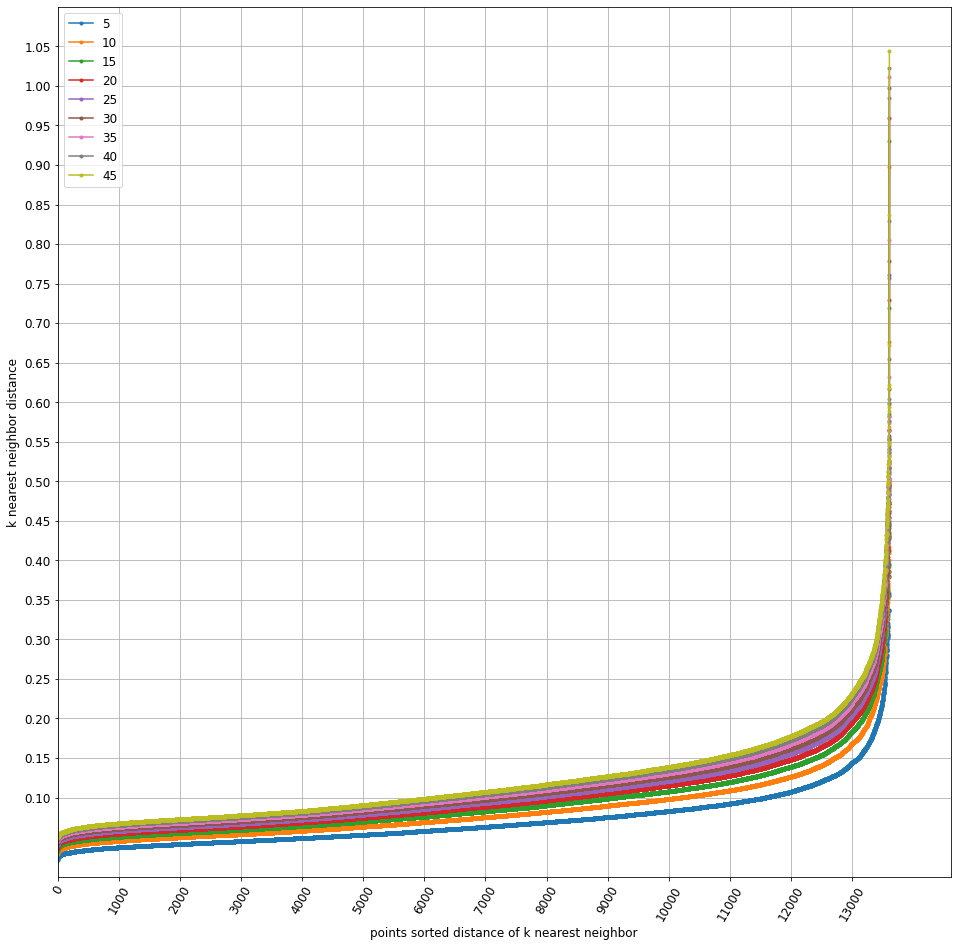

In [20]:
yticks=np.arange(0.1 , 1.1, 0.05)
xticks=np.arange(0,13610,1000)
temp=temp.round(decimals=6)
temp.plot(figsize=(16,16),
           yticks=yticks,xticks=xticks,rot=(60),ylim=(0,1.1),xlim=(-1,14610),
       fontsize=12,grid=True,style ='.-')
plt.legend(prop={"size":12})
plt.ylabel('k nearest neighbor distance',fontsize=12)
plt.xlabel('points sorted distance of k nearest neighbor',fontsize=12)

# DBSCAN  fit


In [34]:
k_stat = time.time()

db_scan = DBSCAN(min_samples=45,eps=0.232116)
db_scan_lable = db_scan.fit_predict(x_nol)
k_end = time.time() - k_stat
print(f'using time is {k_end*1000:.6f} ms ')

using time is 2006.940126 ms 


In [35]:
db_scan_lable

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
df['db_scan_lable'] = db_scan_lable

df_db_scan = df.pivot_table(index=['db_scan_lable'],
                     columns=['Class'],
                     values=['Area'],
                     aggfunc="count")

df_db_scan.columns = df['Class'].value_counts().index
df_db_scan = df_db_scan.fillna(value=0)
df_db_scan

,DERMASON,SIRA,SEKER,HOROZ,CALI,BARBUNYA,BOMBAY
db_scan_lable,,,,,,,
-1,7.0,40.0,4.0,23.0,65.0,10.0,3.0
0,1315.0,0.0,1626.0,3523.0,1863.0,2017.0,2633.0
1,0.0,482.0,0.0,0.0,0.0,0.0,0.0


# purity

In [37]:
def get_purity(df: pd.DataFrame):
    temp = df / df.sum()
    purity = temp.max()
    return purity


df_db_scan['purity'] = df_db_scan.iloc()[1:,:].apply(get_purity, axis=1)
df_db_scan['purity_weight'] = (df_db_scan['purity'] * (df_db_scan.iloc()[:, :-1].sum(axis=1) / df_db_scan.iloc()[:, :-1].sum(axis=1).sum()))
db_scan_total_purity = df_db_scan['purity_weight'].sum()
print(f'total purity for DBSCAN is {db_scan_total_purity:.6f}')
df_db_scan

total purity for DBSCAN is 0.294247


,DERMASON,SIRA,SEKER,HOROZ,CALI,BARBUNYA,BOMBAY,purity,purity_weight
db_scan_lable,,,,,,,,,
-1,7.0,40.0,4.0,23.0,65.0,10.0,3.0,NaN,NaN
0,1315.0,0.0,1626.0,3523.0,1863.0,2017.0,2633.0,0.27148,0.258835
1,0.0,482.0,0.0,0.0,0.0,0.0,0.0,1.00000,0.035413
